# Exercise Notebook - class 7

## Import Packages

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score,  roc_curve, auc, make_scorer

## Read Data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Hospital-Da-Luz-Learning-Health/MLCatolica24/main/Aula%207%20-%20Supervised%20Learning%20III/data/heart_disease.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Diagnosed
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
data.shape

(303, 14)

## EDA

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.438944,9.038662,29.0,48.0,56.0,61.0,77.0
sex,303.0,0.679868,0.467299,0.0,0.0,1.0,1.0,1.0
cp,303.0,3.158416,0.960126,1.0,3.0,3.0,4.0,4.0
trestbps,303.0,131.689769,17.599748,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.693069,51.776918,126.0,211.0,241.0,275.0,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.990099,0.994971,0.0,0.0,1.0,2.0,2.0
thalach,303.0,149.607261,22.875003,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


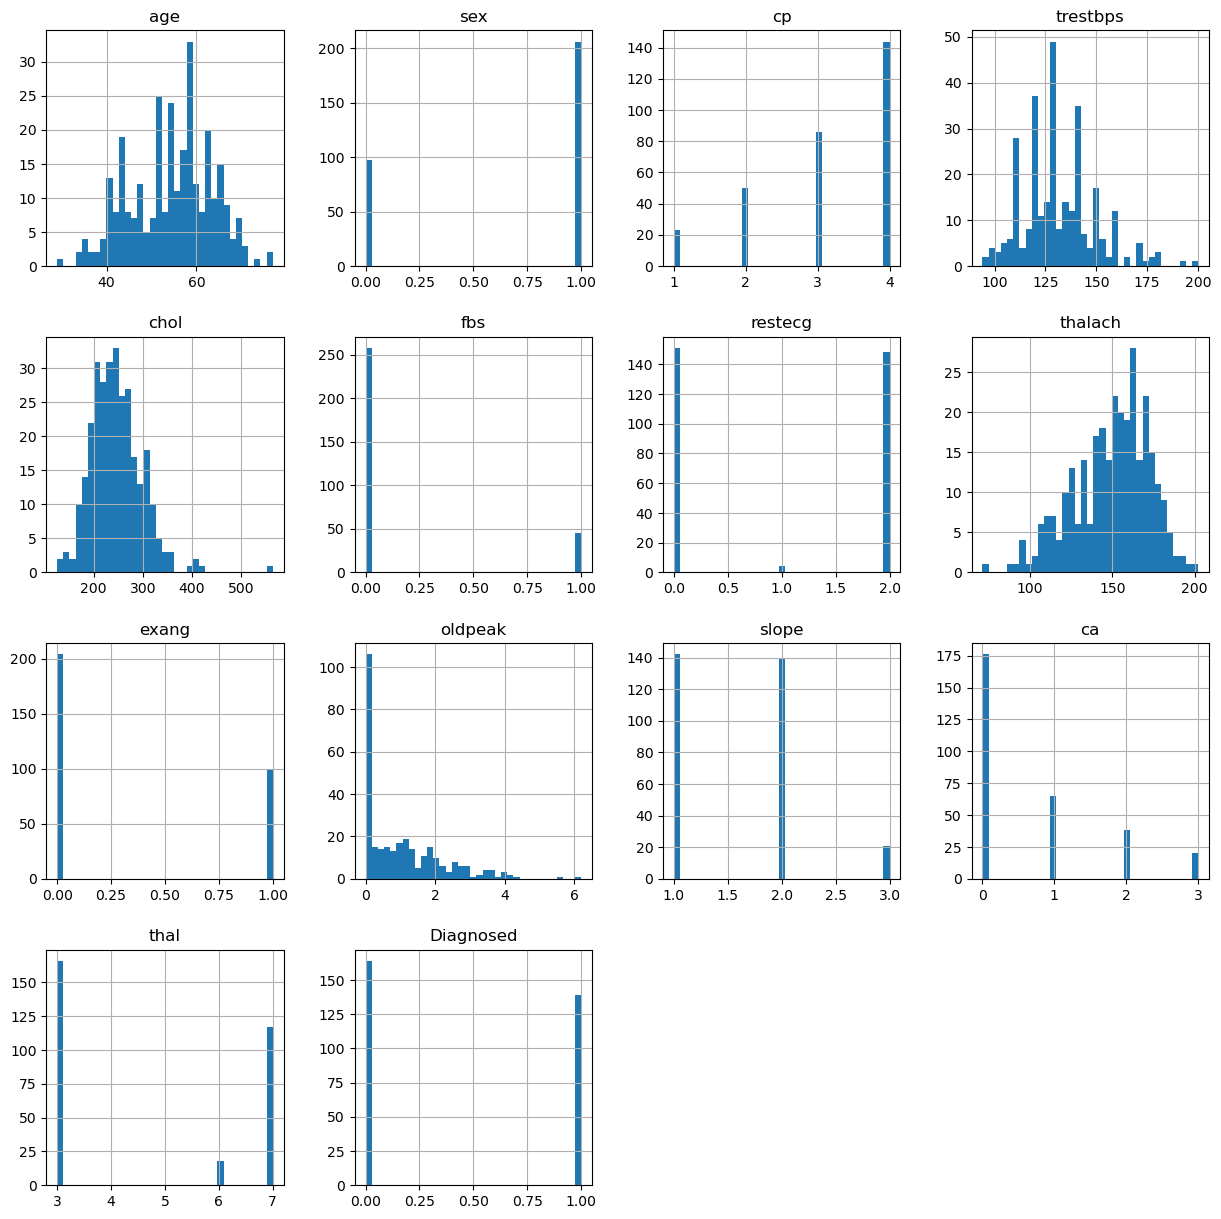

In [6]:
hists = data.hist(bins=35, figsize=(15,15))
plt.show()

## Decision Tree Training

Data selection

In [7]:
X = data.drop('Diagnosed', axis=1)  # Independent variables
y = data['Diagnosed']  # Dependent variable (target)

Train/test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Decision Tree

Define different values for the attributes and interpret the results

In [11]:
#max_depth_value = ...
#min_samples_leaf_value = ...
#min_samples_split_value = ...

In [12]:
dtree=DecisionTreeClassifier(max_depth=max_depth_value, min_samples_leaf=min_samples_leaf_value, min_samples_split=min_samples_split_value, random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10, min_samples_split=10,
                       random_state=0)

Performance on the train set

In [13]:
# check the accuracy 
#y_pred_train = dtree....
accuracy = accuracy_score(y_train, y_pred_train)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


Performance on the test set

In [14]:
# Make predictions on the test set
# y_predict = dtree....

In [15]:
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


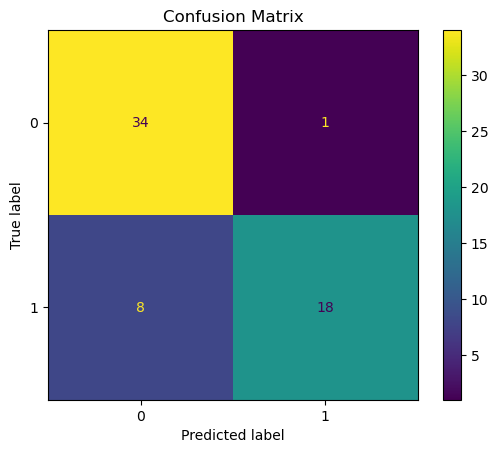

In [17]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_predict)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=dtree.classes_)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Visualize the Decision Tree - use plt_tree() function
plt.figure(figsize=(20, 10))
#plot_tree(...)
plt.title('Decision Tree')
plt.show()

Check the feature importance

In [18]:
# Retrieve feature importance
# feature_importances = dtree....

In [19]:
# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
# Plot feature importances
plt.figure(figsize=(8, 6))
#plt.barh(...)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances in Decision Tree Model')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.grid(True)
plt.show()

## Random Forest Training

Define the Random Forest Parameters you want...

In [21]:
#n_estimators_value = 
# max_depth_value = ...
#min_samples_leaf_value = ...
#min_samples_split_value = ...

In [ ]:
# Train the Random Forest model 
rf_classifier = RandomForestClassifier(n_estimators=n_estimators_value, max_depth=max_depth_value, min_samples_split=min_samples_leaf_value, min_samples_leaf=min_samples_split_value, random_state=42)
rf_classifier.fit(X_train, y_train)

In [24]:
# Make predictions on the train set
#y_predicted_train = rf_classifier....

accuracy = accuracy_score(y_train, y_predicted_train)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90


In [25]:
# Make predictions on the test set
# y_predicted = rf_classifier....

In [26]:
accuracy = accuracy_score(y_test, y_predicted)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.80


You can visualize each tree individually

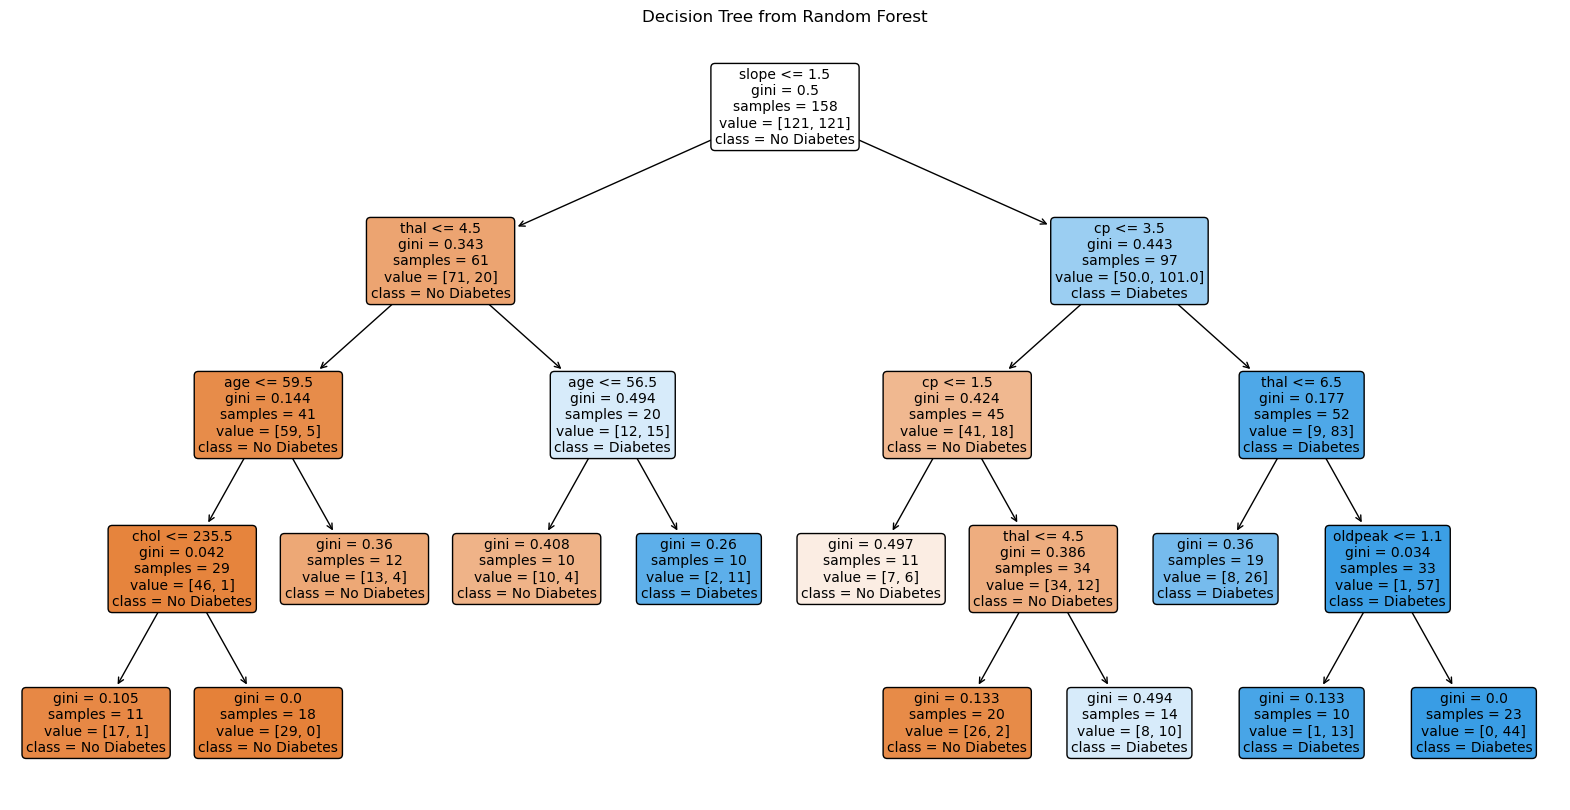

In [27]:
# Select tree number 50 from the forest --> use attribute estimators from the RF model
#one_tree = rf_classifier....

# Visualize the selected tree
plt.figure(figsize=(20, 10))
plot_tree(one_tree, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree from Random Forest')
plt.show()

Compute the features importance of the RF model

In [28]:
# Calculate feature importance --> use attribute feature_importances_ of the RF model
# feature_importances = rf_classifier....

In [29]:
# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
# Plot feature importance
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()
plt.show()